# LeetCode

## Link

1. https://leetcode.com/

2. https://leetcode-cn.com/

## Demo

1. https://www.onlinegdb.com/

## Details

LeetCode: 56, 148, 274

# LeetCode 56. Merge Intervals 合并区间

Given an array of intervals where intervals[i] = [$start_{i}, end_{i}$], merge all overlapping intervals, and return an array of the non-overlapping intervals that cover all the intervals in the input.

以数组 intervals 表示若干个区间的集合，其中单个区间为 intervals[i] = [$start_{i}, end_{i}$] 。请你合并所有重叠的区间，并返回 一个不重叠的区间数组，该数组需恰好覆盖输入中的所有区间 。


Example 1:

```
Input: intervals = [[1,3],[2,6],[8,10],[15,18]]
Output: [[1,6],[8,10],[15,18]]
Explanation: Since intervals [1,3] and [2,6] overlaps, merge them into [1,6].
```

Example 2:

```
Input: intervals = [[1,4],[4,5]]
Output: [[1,5]]
Explanation: Intervals [1,4] and [4,5] are considered overlapping.
```

Constraints:

- 1 <= intervals.length <= $10^4$

- intervals[i].length == 2

- 0 <= $start_{i}$ <= $end_{i}$ <= $10^4$


## 解题思路

先按照区间起点进行排序。然后从区间起点小的开始扫描，依次合并每个有重叠的区间。


In [2]:
from typing import List
class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        intervals.sort()   #排序列表，以区间开头升序排列
        ans = [intervals[0]]
        L, R = 1, 0
        while L < len(intervals):
            if ans[R][1] < intervals[L][0]:   #如果区间不重合，直接append
                ans.append(intervals[L])
                L += 1
                R += 1
            else:      #如果区间重合，就合并区间
                ans[R] = [ans[R][0], max(ans[R][1], intervals[L][1])]
                L += 1
        return ans

# LeetCode 148. Sort List 排序链表

Given the head of a linked list, return the list after sorting it in ascending order.

给你链表的头结点 head ，请将其按 升序 排列并返回 排序后的链表 。

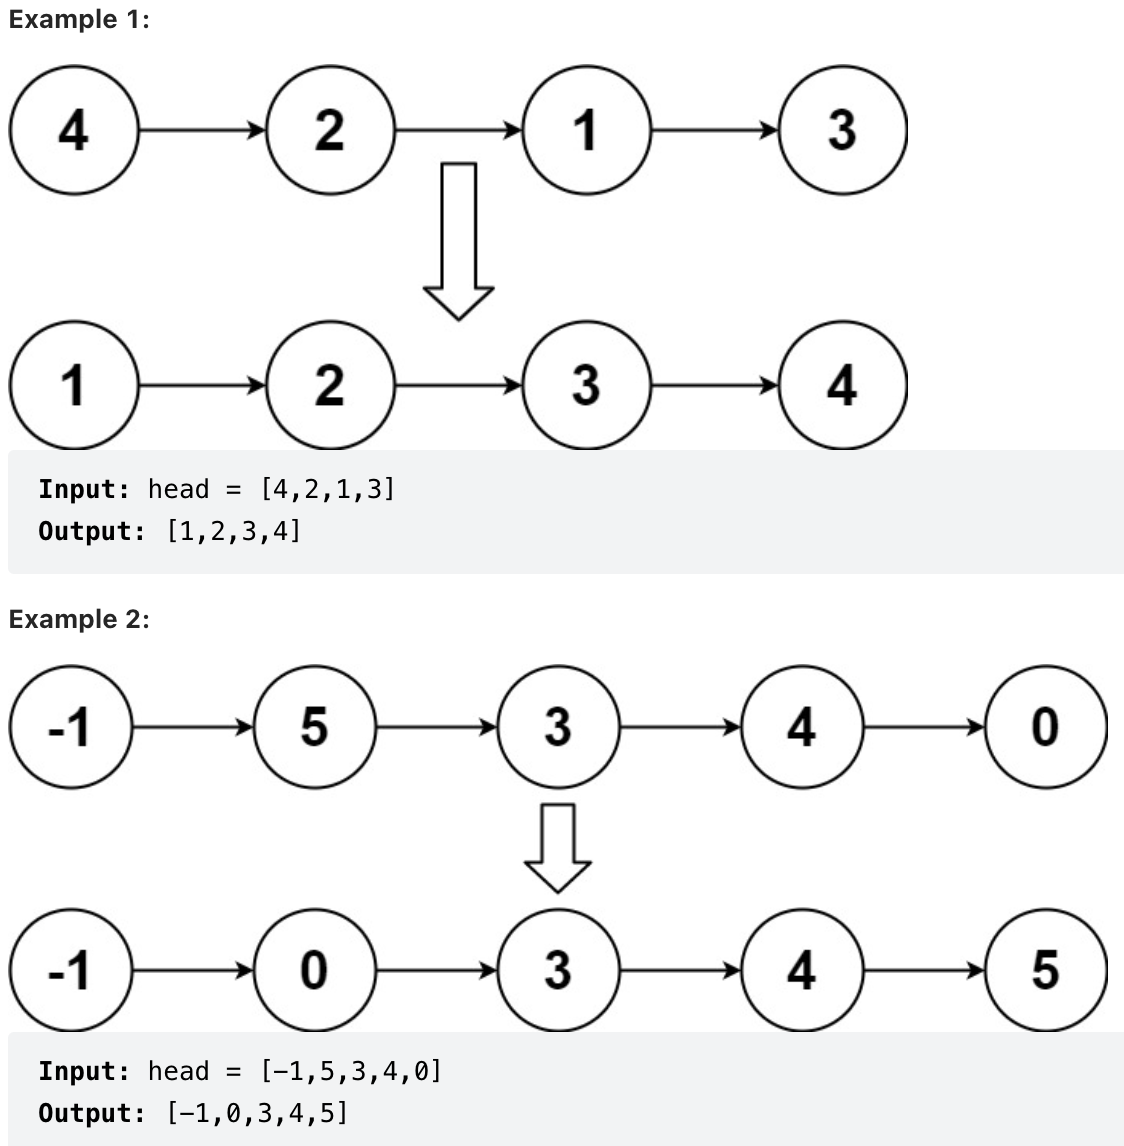

Example 1:

```
Input: head = [4,2,1,3]
Output: [1,2,3,4]
```

Example 2:

```
Input: head = [-1,5,3,4,0]
Output: [-1,0,3,4,5]
```

Example 3:

```
Input: head = []
Output: []
```

Constraints:

- The number of nodes in the list is in the range [0, 5 * $10^4$].(链表中节点的数目在范围 [0, 5 * $10^4$])

- $-10^5$ <= Node.val <= $10^5$

Follow up: Can you sort the linked list in O(n logn) time and O(1) memory (i.e. constant space)?

你可以在 O(n log n) 时间复杂度和常数级空间复杂度下，对链表进行排序吗？


## 解题思路

归并排序 ..

In [6]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def sortList(self, head: ListNode) -> ListNode:
        h_head = ListNode(-1, head)
        mem = []
        while(head is not None):
            next_h = head.next
            head.next = None
            mem.append(head)
            head = next_h
        mem = sorted(mem, key=lambda x: x.val)
        n = len(mem)
        if n == 0:
            return None
        h_head.next = mem[0]
        for i in range(n-1):
            mem[i].next = mem[i+1]     
        return h_head.next

# LeetCode 274. H-Index, H 指数

Given an array of integers citations where citations[i] is the number of citations a researcher received for their ith paper, return compute the researcher's h-index.

According to the definition of h-index on Wikipedia: A scientist has an index h if h of their n papers have at least h citations each, and the other n − h papers have no more than h citations each.

If there are several possible values for h, the maximum one is taken as the h-index.


给你一个整数数组 citations ，其中 citations[i] 表示研究者的第 i 篇论文被引用的次数。计算并返回该研究者的 h 指数。

根据维基百科上 h 指数的定义：h 代表“高引用次数”，一名科研人员的 h指数是指他（她）的 （n 篇论文中）总共有 h 篇论文分别被引用了至少 h 次。且其余的 n - h 篇论文每篇被引用次数 不超过 h 次。

如果 h 有多种可能的值，h 指数 是其中最大的那个。

Example 1:

```
Input: citations = [3,0,6,1,5]
Output: 3
Explanation: [3,0,6,1,5] means the researcher has 5 papers in total and each of them had received 3, 0, 6, 1, 5 citations respectively.
Since the researcher has 3 papers with at least 3 citations each and the remaining two with no more than 3 citations each, their h-index is 3.

给定数组表示研究者总共有 5 篇论文，每篇论文相应的被引用了 3, 0, 6, 1, 5 次。
由于研究者有 3 篇论文每篇 至少 被引用了 3 次，其余两篇论文每篇被引用 不多于 3 次，所以她的 h 指数是 3。
```

Example 2:

```
Input: citations = [1,3,1]
Output: 1
```

Constraints:

- n == citations.length

- 1 <= n <= 5000

- 0 <= citations[i] <= 1000


## 解题思路

可以先将数组里面的数从小到大排序。因为要找最大的 h-index，所以从数组末尾开始往前找，找到第一个数组的值，小于，总长度减去下标的值，这个值就是 h-index。

In [ ]:
class Solution(object):
    def hIndex(self, citations):
        index = 0
        citations.sort(reverse=True)
        for i in citations:
            if i > index:
                index +=1
        return index